Notes:
We still need to determine the model for the repeated measured non-parametic test and adjust all assumption checking models to it
We need to make functions out of the different if/else loops

For next meeting:

Pymer4 lmer won't run!

Check on equal varriance function

Indentation issue for "Make outline for equal varriance testing function" section

In [1]:
import sys
sys.path.append('/Users/Sofie/Documents/DCL/DCLmeetsRETUNE/image_analysis_pipeline/')

In [2]:
from findmycells.main import Project
from findmycells.quantifications import ReconstructCellsIn3DFrom2DInstanceLabels, CountCellsInWholeStructure
#from findmycells.inspection import InspectUsingMultiMatchIDX

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy
#from statsmodels import qqplot
import statsmodels.formula.api as smf
#from statsmodels.formula.api import MixedLM
from scipy.stats import norm, levene, bartlett
import statistics
import statsmodels.api as sm
from fitter import Fitter, get_common_distributions, get_distributions
from pymer4.models import Lm, Lmer

## Load and Prepare the Data

In [4]:
df = pd.read_csv('counted_cells.csv')

In [15]:
df.tail(10)

,Unnamed: 0,file_id,group_id,subject_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
51,51,54,wt,#7_wt_old,8767360.0,9.0,86.0,130.837103,14.537456
52,52,55,wt,#7_wt_old,5892928.0,8.0,12.0,27.161354,3.395169
53,53,56,wt,#7_wt_old,4314688.0,9.0,70.0,216.396361,24.044040
54,54,57,wt,#9_wt_old,5140832.0,8.0,46.0,119.350909,14.918864
55,55,58,wt,#9_wt_old,4477600.0,8.0,71.0,211.501944,26.437743
56,56,59,wt,#9_wt_old,7410528.0,9.0,184.0,331.184482,36.798276
57,57,60,wt,#9_wt_old,7109728.0,10.0,152.0,285.162170,28.516217
58,58,61,wt,#9_wt_old,5770116.0,9.0,123.0,284.329471,31.592163
59,59,62,wt,#9_wt_old,5751712.0,9.0,86.0,199.435575,22.159508
60,60,63,wt,#9_wt_old,4715968.0,10.0,96.0,271.519917,27.151992


In [6]:
df.describe()

,Unnamed: 0,file_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
count,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000
mean,30.000000,31.622951,5.329419e+06,8.442623,63.295082,159.958337,18.747975
std,17.752934,19.069316,1.715786e+06,0.940294,36.455152,84.831816,9.527849
min,0.000000,0.000000,4.195400e+05,6.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,4.477600e+06,8.000000,41.000000,92.881431,11.610179
50%,30.000000,33.000000,5.251488e+06,8.000000,65.000000,169.548150,19.004340
75%,45.000000,48.000000,6.312800e+06,9.000000,83.000000,216.396361,26.251630
max,60.000000,63.000000,9.264510e+06,11.000000,184.000000,331.184482,39.079717


## Let's check normality

In [24]:
stat_results = dict()

In [25]:
from typing import Dict, List, Tuple

def check_normality(data: pd.DataFrame, dv_col: str, results: Dict) -> Dict:
    stat, p = shapiro(data[dv_col])
    if p >= 0.05:
        normal = True
    else:
        normal = False
    results['normal_distribution'] = {'test_statistic': stat, 'p-value': p, 'bool': normal}
    return results

In [26]:
check_normality(df, 'cc_normalized_per_volume', stat_results)

{'normal_distribution': {'test_statistic': 0.9805209636688232,
  'p-value': 0.43962615728378296,
  'bool': True}}

### Make outline for equal varriance testing function

In [42]:
#def equal_variance_test(data: pd.DataFrame, dv_col: str, results: Dict) -> Dict:
#you where working on ensure this ran so you could make the function below run and then put it into the main function to ensure that equal varriance could be tested
    
    #Make dataframes compatible for Levene's and Bartlett's test
df_tg = df.loc[df['group_id'] == 'tg']
df_tg = df_tg.rename(columns={"cc_normalized_per_volume": "tg"})

df_wt = df.loc[df['group_id'] == 'wt']
df_wt = df_wt.rename(columns={"cc_normalized_per_volume": "wt"})

if stat_results['normal_distribution']['bool'] == False: #non-normal data
    stat, p_homo = levene(df_wt['wt'], df_tg['tg'])
        if p_homo >= 0.05:
            normal = True
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
        elif p_homo < 0.05:
            normal = False
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
elif: stat_results['normal_distribution']['bool'] == True: #normal data
    stat, p_homo = bartlett(df_wt['wt'], df_tg['tg'])
        if p_homo >= 0.05:
            normal = True
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
        elif p_homo < 0.05:
            normal = False
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
else: print('Normality not assessed yet. Please complete normality test before proceeding')

IndentationError: unexpected indent (<ipython-input-42-2236e4426df9>, line 12)

#### Attempt to make function out of the code above

In [ ]:
def equal_variance_test(data: pd.DataFrame, dv_col: str, iv_col: str, results: Dict) -> Dict:
    #note that in iv_col we NEED items to be called 'tg' and 'wt' --> how to work around? we just need to seperate based on level
    
    #Make dataframes compatible for Levene's and Bartlett's test
    df_tg = data.loc[data[iv_col] == 'tg']
    df_tg = df_tg.rename(columns={dv_col: "tg"})

    df_wt = data.loc[data[iv_col] == 'wt']
    df_wt = df_wt.rename(columns={dv_col: "wt"})

    if stat_results['normal_distribution']['bool'] == False: #non-normal data
        stat, p_homo = levene(df_wt['wt'], df_tg['tg'])
        if p_homo >= 0.05:
            normal = True
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
        elif p_homo < 0.05:
            normal = False
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
    elif: stat_results['normal_distribution']['bool'] == True: #normal data
        stat, p_homo = bartlett(df_wt['wt'], df_tg['tg'])
        if p_homo >= 0.05:
            normal = True
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
        elif p_homo < 0.05:
            normal = False
            results['fixed_effects_equal_varriance'] = {'test_statistic': stat, 'p-value': p_homo, 'bool': normal}
    else: print('Normality not assessed yet. Please complete normality test before proceeding')
    return results

### create function for LMER

In [9]:
from statsmodels.regression.mixed_linear_model import MixedLMResultsWrapper

def create_a_mixed_linear_model(data: pd.DataFrame, dv_col: str, fixed_effects_col: str, random_effects_col: str) -> MixedLMResultsWrapper:
    return smf.mixedlm(f"{dv_col} ~ {fixed_effects_col}", data, groups = random_effects_col).fit()


### Initial function for normality and model creation

In [190]:
stat_results = check_normality(data=df, dv_col='cc_normalized_per_volume', results = stat_results)
if stat_results['normal_distribution']['bool']:
    model = create_a_mixed_linear_model(data = df, dv_col = 'cc_normalized_per_volume', fixed_effects_col = 'group_id', random_effects_col = 'subject_id')
else:
    # exit to get user feedback
    

SyntaxError: unexpected EOF while parsing (<ipython-input-190-413774167b35>, line 5)

### Define plot for equal varriance

In [212]:
def plot_fixed_effect_varriance(data: pd.DataFrame, dv_col: str, fixed_effects_col: str, random_effects_col: str) -> plt:
    fig = plt.figure(figsize=(10,12), facecolor='white')
    gs = fig.add_gridspec(2, 1)
    ax1 = fig.add_subplot(gs[0,0])
    sns.violinplot(data = data[data[fixed_effects_col] == 'wt'], x=random_effects_col, y=dv_col, ax = ax1)
    ax2 = fig.add_subplot(gs[1,0])
    sns.violinplot(data = data[data[fixed_effects_col] == 'tg'], x=random_effects_col, y=dv_col, ax = ax2)
    plt.show()

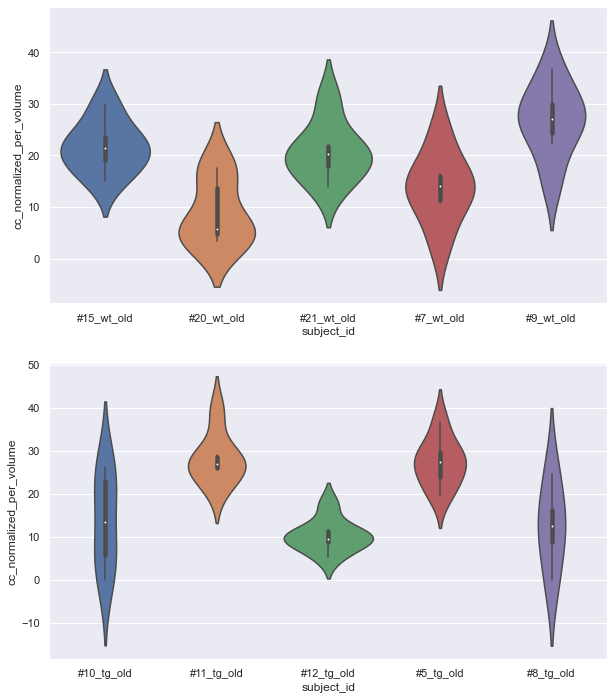

In [213]:
plot_fixed_effect_varriance(data = df, dv_col = 'cc_normalized_per_volume', fixed_effects_col = 'group_id', random_effects_col = 'subject_id')

### Define fitter plot

In [ ]:
def visualize_distributions(data: pd.DataFrame, dv_col: str, distributions: list):
    f = Fitter(data[dv_col], distributions=distributions)
    f.fit()
    return f.summary()


In [ ]:
visualize_distributions(data=df, dv_col='cc_normalized_per_volume', distributions=["gamma","lognorm","norm"])

### Play with pymer4
https://eshinjolly.com/pymer4/auto_examples/example_01_basic_usage.html#sphx-glr-auto-examples-example-01-basic-usage-py

In [5]:
#LM models
model = Lm("cc_normalized_per_volume ~ group_id", data=df)
print(model.fit())

Formula: cc_normalized_per_volume~group_id

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 61	 R^2: 0.000	 R^2_adj: -0.017

Log-likelihood: -223.555 	 AIC: 451.111	 BIC: 455.332

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE  DF  T-stat  P-val  Sig
Intercept         18.846  15.336   22.356  1.754  59  10.744  0.000  ***
group_id[T.wt]    -0.194  -5.117    4.730  2.461  59  -0.079  0.937     


In [14]:
model = Lmer("cc_normalized_per_volume ~ group_id + (1|subject_id)", data=df)
print(model.fit())


ValueError: Length mismatch: Expected axis has 7 elements, new values have 2 elements

### Funtion for GLM

In [ ]:
df.loc[df['group_id'] == 'wt', 'group_id'] = -1
df.loc[df['group_id'] == 'tg', 'group_id'] = 1
df['group_id'] = pd.Categorical(df['group_id'])
df['cc_normalized_per_volume']

In [ ]:
#make GLM run - endo = DV, exo = IDV
glm = sm.GLM(df['cc_normalized_per_volume'], df['group_id'], family=sm.families.Gaussian()) #supports Gamma, InverseGaussian, Gaussian
res = glm.fit()
print(res.summary())

## Main function

In [ ]:
# Example how the bigger picture could look like
#note! equal_variance_test() is not functioning yet
#Note: make dict a global varribale and append for each function?
def compute_statistics(data: pd.DataFrame, dv_col: str, iv_col: str, results: Dictdistribution_type: Optional[str]=None) -> Dict:
    stat_results = check_normality(data=df, dv_col='cc_normalized_per_volume', results = stat_results)
    if stat_results['normal_distribution']['bool']:
        model = create_a_mixed_linear_model(data = df, dv_col = 'cc_normalized_per_volume', fixed_effects_col = 'group_id', random_effects_col = 'subject_id')
        return model
    else:
        #Visualize the equaliy between the different groups
        print("Normality could not be assumed. To determine which statistical model to use, please select if the varriance between different the different groups is equal")
        plot_fixed_effect_varriance(data = df, dv_col = 'cc_normalized_per_volume', fixed_effects_col = 'group_id', random_effects_col = 'subject_id')
        #exit to make the user decide if varriance is equal and somehow note that in the results file. Note as 'fixed_effects_equal_varriance'
        # exit if distribution_type == None:
            # exit
        # if defined: adjusted_model = create_adjusted_model(data, distribution_type
        
        #ALTERNATIVELY
    else:
        #Make dataframes compatible for Levene's and Bartlett's test
        equal_variance_test(data, dv_col, iv_col, results)

Model below is a continuation to deal with non-normal data

In [ ]:
def compute_statistics_non_normal(data: pd.DataFrame, dv_col: str, distribution_type: Optional[str]=None) -> Dict:
    #if we have equal varriance in fixed effects and not yet a determined GLM distribution
    if stat_results['fixed_effects_equal_varriance']['bool'] == True: #if we have equal varriance
        #GLM can only handle gamma, inverse gausian or normal
        visualize_distributions(data=df, dv_col='cc_normalized_per_volume', distributions=["gamma","invgauss","norm"])
        print("Your data can be used in a generlized linear model. Please select the name of the distribution that matches your data. If none, please note none.")
        #make an entery in stat_results['GLM_distribution']
        # if stat_results['GLM_distribution'] == 'none', then restart model
        #if stat_results['GLM_distribution'] is anything else than none, run GLM with that distribution
        
        #if we have equal varriance in fixed effects and have determined that no GLM distribution will work
    elif: stat_results['GLM_distribution'] == 'none' OR stat_results['GLMM_distribution'] == 'none': #if GLM won't work 
        #run non-parametric function on aggragated data
        #find a good parametic model
        
        #in cases there there is no equal varriance
    elif: stat_results['fixed_effects_equal_varriance']['bool'] == False:
        #run GLMM - can only handle gamma, lognorm, norm
        visualize_distributions(data=df, dv_col='cc_normalized_per_volume', distributions=["gamma","lognorm","norm"])
        print("Your data can be used in a generlized linear mixed effects model. Please select the name of the distribution that matches your data. If none, please note none.")
        #make an entery in stat_results['GLMM_distribution']
        # if stat_results['GLMM_distribution'] == 'none', then restart model
        #if stat_results['GLMM_distribution'] is anything else than none, run GLMM with that distribution
        
    #elif: stat_results['fixed_effects_equal_varriance']['bool'] == False & stat_results['GLMM_distribution'] == 'none':
        #run non-parametric function on aggragated data
        #find a way to aggragate data across subject_id without losing group_id
        #find a good parametic model
        
        #exit to make the user decide if varriance is equal and somehow note that in the results file
        # exit if distribution_type == None:
            # exit
        # if defined: adjusted_model = create_adjusted_model(data, distribution_type

In [247]:
#attempt to aggregate the data (very unsucessfully)
df_agg=df.groupby('subject_id', as_index=False).agg(lambda x: set(x))

#df_agg = df.groupby('subject_id').mean('cc_normalized_per_volume')
df_agg.tail(10)

,subject_id,Unnamed: 0,file_id,group_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
0,#10_tg_old,"{0, 1, 2, 3, 4, 5}","{0, 1, 2, 3, 4, 5}",{tg},"{1118784.0, 6422816.0, 4181696.0, 5697120.0, 5...","{8.0, 9.0}","{0.0, 32.0, 64.0, 69.0, 73.0, 16.0}","{0.0, 66.45471610969527, 39.557767625361855, 2...","{0.0, 4.944720953170234, 8.306839513711909, 18..."
1,#11_tg_old,"{6, 7, 8, 9, 10, 11}","{6, 7, 8, 9, 10, 11}",{tg},"{3145632.0, 5585408.0, 4864864.0, 6271584.0, 5...","{6.0, 7.0, 8.0, 9.0, 10.0, 11.0}","{69.0, 147.0, 53.0, 85.0, 87.0, 89.0}","{128.68719163583685, 258.8572590324544, 292.57...","{39.07971731852778, 21.447865272639472, 25.885..."
2,#12_tg_old,"{12, 13, 14, 15, 16, 17, 18}","{12, 13, 14, 15, 16, 17, 18}",{tg},"{4786560.0, 5889504.0, 5781600.0, 3744096.0, 5...","{8.0, 9.0}","{35.0, 38.0, 49.0, 19.0, 53.0, 24.0, 25.0}","{69.66550839499172, 43.030479859760696, 80.957...","{5.378809982470087, 8.708188549373968, 8.99532..."
3,#15_wt_old,"{32, 33, 34, 35, 30, 31}","{33, 34, 35, 36, 37, 38}",{wt},"{5821568.0, 5198432.0, 5624544.0, 4039840.0, 5...","{8.0, 9.0}","{70.0, 72.0, 74.0, 83.0, 51.0, 58.0}","{169.5481495973026, 237.72214525471782, 177.79...","{15.11799439120728, 18.83868328858918, 19.7548..."
4,#20_wt_old,"{36, 37, 38, 39, 40, 41}","{39, 40, 41, 42, 43, 44}",{wt},"{4846016.0, 7168000.0, 6939936.0, 6441280.0, 4...","{8.0, 9.0, 10.0, 7.0}","{41.0, 13.0, 14.0, 19.0, 53.0, 26.0}","{36.517366047176814, 38.06699051250394, 48.381...","{3.3649800709026088, 4.564670755897102, 5.4381..."
5,#21_wt_old,"{42, 43, 44, 45, 46, 47}","{45, 46, 47, 48, 49, 50}",{wt},"{6894496.0, 6043904.0, 7025952.0, 2560096.0, 7...","{9.0, 10.0}","{65.0, 99.0, 132.0, 102.0, 84.0, 59.0}","{192.5740105289468, 307.39519167913653, 218.48...","{13.97235568204844, 17.718742938878954, 19.004..."
6,#5_tg_old,"{19, 20, 21, 22, 23, 24, 25}","{19, 20, 21, 22, 23, 24, 25}",{tg},"{4422592.0, 4941856.0, 4094560.0, 6312800.0, 3...","{8.0, 6.0, 7.0}","{65.0, 70.0, 41.0, 74.0, 75.0, 52.0, 84.0}","{293.95110707257726, 175.4383683466581, 177.48...","{36.74388838407216, 19.603688362936087, 22.592..."
7,#7_wt_old,"{48, 49, 50, 51, 52, 53}","{51, 52, 53, 54, 55, 56}",{wt},"{5079872.0, 8607776.0, 5892928.0, 8767360.0, 7...","{8.0, 9.0}","{70.0, 12.0, 49.0, 50.0, 86.0}","{130.8371034575029, 131.28603864945092, 108.46...","{3.3951692862678615, 10.721738183178516, 13.55..."
8,#8_tg_old,"{26, 27, 28, 29}","{32, 26, 27, 31}",{tg},"{7858784.0, 5415904.0, 419540.0, 2713216.0}",{8.0},"{64.0, 0.0, 19.0, 80.0}","{0.0, 197.02454747388825, 108.62403494098032, ...","{0.0, 24.62806843423603, 11.675636184880785, 1..."
9,#9_wt_old,"{54, 55, 56, 57, 58, 59, 60}","{57, 58, 59, 60, 61, 62, 63}",{wt},"{5140832.0, 7410528.0, 7109728.0, 4477600.0, 5...","{8.0, 9.0, 10.0}","{96.0, 71.0, 46.0, 86.0, 184.0, 123.0, 152.0}","{199.4355745505291, 331.1844823948643, 271.519...","{36.79827582165159, 14.91886357082283, 22.1595..."


### Chunk below not used currently in functions

In [105]:
stat, p = shapiro(df['cc_normalized_per_volume'])
if p >= 0.05:
    print("Normality can be assumed. The p-value for the shapiro test was {}".format(p))
    model = smf.mixedlm("cc_normalized_per_volume ~ group_id", df, groups = "subject_id").fit()
else:
    print("WARNING: Normality is violated. Run non-parametric model. The p-value for the shapiro test was {}".format(p))
    #insert model here

Normality can be assumed. The p-value for the shapiro test was 0.43962615728378296


In [108]:
shapiro(df['cc_normalized_per_volume'])

ShapiroResult(statistic=0.9805209636688232, pvalue=0.43962615728378296)

In [11]:
#Check it's running before putting it into the model
model = smf.mixedlm("cc_normalized_per_volume ~ group_id", df, groups = "subject_id").fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:            MixedLM Dependent Variable: cc_normalized_per_volume
No. Observations: 61      Method:             REML                    
No. Groups:       10      Scale:              45.9057                 
Min. group size:  4       Log-Likelihood:     -208.4239               
Max. group size:  7       Converged:          Yes                     
Mean group size:  6.1                                                 
------------------------------------------------------------------------
                    Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept           18.494      3.538    5.227   0.000   11.559   25.429
group_id[T.wt]      -0.083      4.994   -0.017   0.987   -9.871    9.705
subject_id Var      54.667      4.923                                   
======================================================================

"""

In [6]:
import statsmodels.api as sm

In [7]:
sm.GLM

statsmodels.genmod.generalized_linear_model.GLM

In [13]:
df.dtypes

Unnamed: 0                    int64
file_id                       int64
group_id                     object
subject_id                   object
analyzed_area               float64
total_planes                float64
connected_components        float64
cc_normalized_per_area      float64
cc_normalized_per_volume    float64
dtype: object

In [14]:
data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)

In [87]:
df.dtypes

Unnamed: 0                     int64
file_id                        int64
group_id                    category
subject_id                    object
analyzed_area                float64
total_planes                 float64
connected_components         float64
cc_normalized_per_area       float64
cc_normalized_per_volume     float64
dtype: object

### Non-parametric model for repeated measures?

In [29]:
#subset for Friedman model
df_friedman = df[["group_id", "subject_id", "cc_normalized_per_volume"]]
df_friedman.head(20)

,group_id,subject_id,cc_normalized_per_volume
0,tg,#10_tg_old,0.000000
1,tg,#10_tg_old,18.729920
2,tg,#10_tg_old,8.306840
3,tg,#10_tg_old,4.944721
4,tg,#10_tg_old,24.454311
5,tg,#10_tg_old,26.251630
6,tg,#11_tg_old,26.598050
7,tg,#11_tg_old,39.079717
8,tg,#11_tg_old,21.447865
9,tg,#11_tg_old,28.997950


In [ ]:
#Problem: I can't figure out if this works when we're only dealing with 2 levels or what the data format should be
pg.friedman(df_friedman)

In [44]:
pg.kruskal(data=df, dv='cc_normalized_per_volume', between='subject_id')

,Source,ddof1,H,p-unc
Kruskal,subject_id,9,35.850338,0.000042


### Plotting Normality - used on existing model

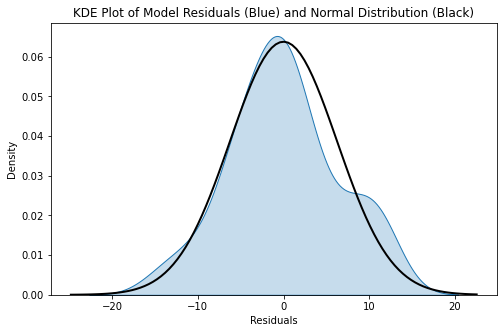

In [50]:
#2 types of normality plots
#kde_kws = {"shade" : True, "lw": 1}
fig = plt.figure(figsize=(8,5), facecolor='white')
ax = fig.add_subplot()
sns.kdeplot(model.resid, fill=True, ax=ax)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(model.resid)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

#sns.kdeplot(normal_dist, color = 'k', ax=ax)

plt.title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
plt.xlabel("Residuals")
plt.show()

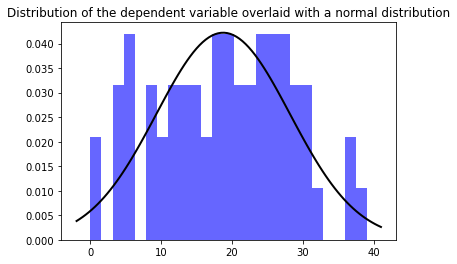

In [13]:
#h = sns.displot(df, x="cc_normalized_per_volume", kind="kde")
#df_normal = np.random.normal(statistics.mean(df['cc_normalized_per_volume']),statistics.stdev(df['cc_normalized_per_volume']),61)
df_hist = df['cc_normalized_per_volume']
mu, std = norm.fit(df_hist)
plt.hist(df_hist, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Distribution of the dependent variable overlaid with a normal distribution".format(mu, std)
plt.title(title)
  
plt.show()

#Problem: the histogram doesn't seem to represent our data - figure out why when you have time
#def map_pdf(x, **kwargs):
#    mu, std = scipy.stats.norm.fit(x)
#    x0, x1 = p1.axes[0][0].get_xlim()  # axes for p1 is required to determine x_pdf
#    x_pdf = np.linspace(x0, x1, 100)
#    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
#    plt.plot(x_pdf, y_pdf, c='r')


#p1 = sns.displot(data=df_hist, x=df_hist['cc_normalized_per_volume'], kind='hist', bins=40, stat='density')
#p1.map(map_pdf, 'cc_normalized_per_volume')

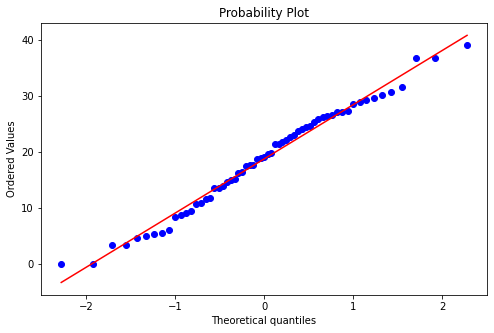

In [51]:
fig = plt.figure(figsize=(8,5), facecolor='white')
ax = fig.add_subplot()
ax = scipy.stats.probplot(df['cc_normalized_per_volume'], dist="norm", plot=plt)
plt.show()

## Checking homoscedasticity
#### Preparing data

In [17]:
#Make dataframes compatible for Levene's and Bartlett's test
df_tg = df.loc[df['group_id'] == 'tg']
df_tg = df_tg.rename(columns={"cc_normalized_per_volume": "tg"})

df_wt = df.loc[df['group_id'] == 'wt']
df_wt = df_wt.rename(columns={"cc_normalized_per_volume": "wt"})

,Unnamed: 0,file_id,group_id,subject_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,wt
30,30,33,wt,#15_wt_old,5821568.0,9.0,74.0,169.548150,18.838683
31,31,34,wt,#15_wt_old,4212252.0,8.0,58.0,183.660160,22.957520
32,32,35,wt,#15_wt_old,4039840.0,8.0,72.0,237.722145,29.715268
33,33,36,wt,#15_wt_old,5624544.0,8.0,51.0,120.943955,15.117994
34,34,37,wt,#15_wt_old,5198432.0,9.0,83.0,212.964411,23.662712
35,35,38,wt,#15_wt_old,5251488.0,9.0,70.0,177.793947,19.754883
36,36,39,wt,#20_wt_old,4846016.0,9.0,53.0,145.878851,16.208761
37,37,40,wt,#20_wt_old,6939936.0,8.0,19.0,36.517366,4.564671
38,38,41,wt,#20_wt_old,7168000.0,8.0,26.0,48.381203,6.047650
39,39,42,wt,#20_wt_old,4905472.0,7.0,14.0,38.066991,5.438142


### Homoscedasticity loop based on normality - non-model related

In [53]:
stat, p_norm = shapiro(df['cc_normalized_per_volume'])
if p_norm >= 0.05:
    print("Normality can be assumed, running Bartlett's test")
    stat, p_homo = levene(df_wt['wt'], df_tg['tg'])
    if p_homo >= 0.05:
        print ("Homoscedasticity is not violated. P-value for Bartlett's test was {}".format(p_homo))
    elif p_homo < 0.05:
        print("Homoscedasticity is violated. P-value for Bartlett's test was {}. Consider running data transformations".format(p_homo))
else:
    print("WARNING: Normality is violated, running Levene's test")
    stat, p_homo = levene(df_wt['wt'], df_tg['tg'])
    if p_homo >= 0.05:
        print ("Homoscedasticity is not violated. P-value for Levene's test was {}".format(p_homo))
    elif p_homo < 0.05:
        print("Homoscedasticity is violated. P-value for Levene's test was {}".format(p_homo))

Normality can be assumed, running Bartlett's test
Homoscedasticity is not violated. P-value for Bartlett's test was 0.14548546852666838


#### Visualizing Homoscedasticity - model related
Generally, if the ratio of the largest variance to the smallest variance is 1.5 or below, the data is homoscedastic.
Simply put, homoscedasticity means “having the same scatter.” For it to exist in a set of data, the points must be about the same distance from the line.
Source: https://www.statisticshowto.com/homoscedasticity/
Code source: https://www.pythonfordatascience.org/mixed-effects-regression-python/

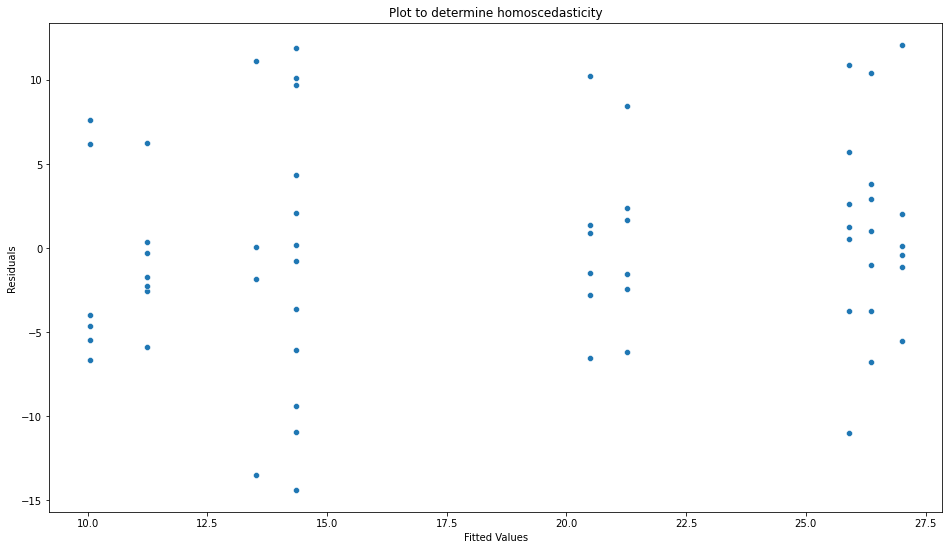

In [55]:
fig = plt.figure(figsize = (16, 9))
ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)
ax.set_title("Plot to determine homoscedasticity")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
plt.show()

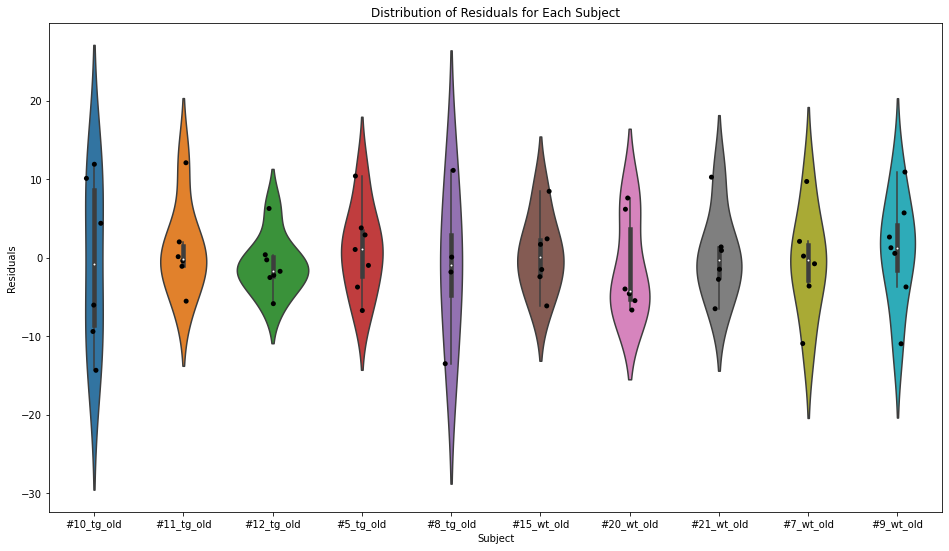

In [62]:
fig = plt.figure(figsize = (16, 9))
ax = sns.stripplot(x = model.model.groups, y = model.resid, color='k')
ax = sns.violinplot(x = model.model.groups, y = model.resid)
ax.set_title("Distribution of Residuals for Each Subject")
ax.set_ylabel("Residuals")
ax.set_xlabel("Subject")
plt.show()

# Linearity
To determine if we have linearity, the points should be symmetrically distributed around a horizontal line, with a roughly constant variance. 
Source: https://people.duke.edu/~rnau/testing.htm

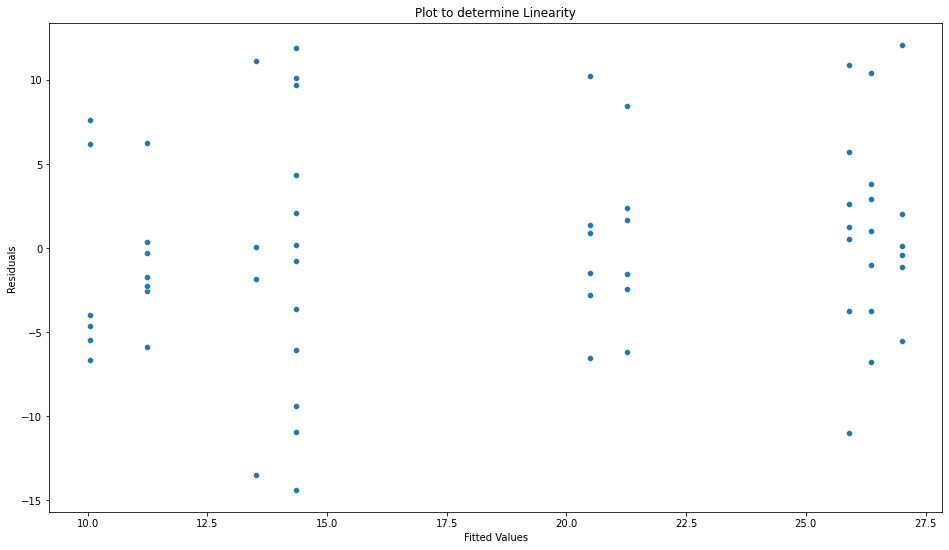

In [64]:
fig = plt.figure(figsize = (16, 9))
ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)
ax.set_title("Plot to determine Linearity")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
plt.show()

### Outlier removal

In [68]:
df['cc_normalized_per_volume']

0      0.000000
1     18.729920
2      8.306840
3      4.944721
4     24.454311
        ...    
56    36.798276
57    28.516217
58    31.592163
59    22.159508
60    27.151992
Name: cc_normalized_per_volume, Length: 61, dtype: float64

In [78]:
df_filtered

,Unnamed: 0,file_id,group_id,subject_id,analyzed_area,total_planes,connected_components,cc_normalized_per_area,cc_normalized_per_volume
0,0,0,tg,#10_tg_old,1118784.0,8.0,0.0,0.000000,0.000000
1,1,1,tg,#10_tg_old,5697120.0,8.0,64.0,149.839362,18.729920
2,2,2,tg,#10_tg_old,6422816.0,8.0,32.0,66.454716,8.306840
3,3,3,tg,#10_tg_old,5394976.0,8.0,16.0,39.557768,4.944721
4,4,4,tg,#10_tg_old,4181696.0,9.0,69.0,220.088800,24.454311
...,...,...,...,...,...,...,...,...,...
56,56,59,wt,#9_wt_old,7410528.0,9.0,184.0,331.184482,36.798276
57,57,60,wt,#9_wt_old,7109728.0,10.0,152.0,285.162170,28.516217
58,58,61,wt,#9_wt_old,5770116.0,9.0,123.0,284.329471,31.592163
59,59,62,wt,#9_wt_old,5751712.0,9.0,86.0,199.435575,22.159508


In [93]:
cutoff = 1.5*df['cc_normalized_per_volume'].std()
mean = df['cc_normalized_per_volume'].mean()
min_value, max_value = df['cc_normalized_per_volume'].min(), df['cc_normalized_per_volume'].max()

df_filtered = df[(df.cc_normalized_per_volume >= mean - cutoff) & (df.cc_normalized_per_volume <= mean + cutoff)]

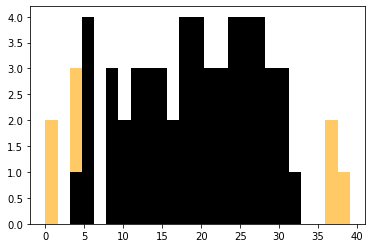

In [ ]:
plt.hist(df['cc_normalized_per_volume'], bins=25, range=(min_value, max_value), alpha=0.6, color='orange')
plt.hist(df_filtered['cc_normalized_per_volume'], bins=25, range=(min_value, max_value), color='black')
plt.show()


# Generlized linear mixed effects model

In [ ]:
#inserted code chunk to deal with later
gp_model = gpb.GPModel(group_data=group_data, likelihood="binary")
gp_model.fit(y=y, X=X)
gp_model.summary()

#p-values
gp_model = gpb.GPModel(group_data=group, likelihood="binary")
gp_model.fit(y=y, X=X, params={“std_dev”: True})
coefs = gp_model.get_coef()
z_values = coefs[0] / coefs[1]
p_values = 2 * stats.norm.cdf(-np.abs(z_values))
print(p_values) # show p-values

#predictions
pred = gp_model.predict(X_pred=X_test, group_data_pred=group_test,
                        predict_var=True, predict_response=False)
print(pred['mu'])  # predicted latent mean
print(pred['var']) # predicted latent variance

group_data_pred is a matrix or vector with categorical grouping variable(s) for which predictions are made

X_pred is a matrix with fixed effects covariate data for which predictions are made

predict_var (boolean) indicates whether predictive variances should be calculated in addition to the mean

predict_response (boolean) indicates whether the response y or the latent Xb + Zu should be predicted. I.e., the random effects part is also predicted. If group_data_pred contains new, unobserved categories, the corresponding random effects predictions will be 0.

## Visualize the distributions

In [199]:
from fitter import get_distributions
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'pow

,sumsquare_error,aic,bic,kl_div
norm,0.088308,780.197966,-390.583766,inf
gamma,0.088521,781.830249,-386.326211,inf
lognorm,0.090317,784.101266,-385.100941,inf


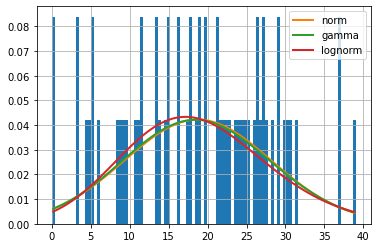

In [24]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df['cc_normalized_per_volume'],
           distributions=['gamma',
                          'lognorm',
                          "norm"])
f.fit()
f.summary()

In [32]:
#Try to change the histogram bins - pylab won't load
import pylab
#f.hist()
pylab.hist(f, bins=self.bins, density=self._density)
        pylab.grid(True)

IndentationError: unexpected indent (<ipython-input-32-5d1357663cf5>, line 4)

In [202]:
#figure out which method is best based on the available criteria
f.get_best(method = 'aic')

(1003.851620085713, -281.42077120667045, 0.2990063234933311)

In [ ]:
#get parameters for a certain function - not noted what they mean
f.fitted_param['gamma']

In [203]:
#datapoints for the probability density function
f.fitted_pdf['gamma']

array([0.00608565, 0.00661695, 0.00718079, 0.00777772, 0.00840815,
       0.00907235, 0.00977038, 0.01050215, 0.01126737, 0.01206553,
       0.01289592, 0.01375758, 0.01464934, 0.01556979, 0.01651727,
       0.01748987, 0.01848546, 0.01950164, 0.0205358 , 0.02158508,
       0.02264642, 0.02371654, 0.02479199, 0.02586912, 0.02694414,
       0.02801312, 0.02907202, 0.03011671, 0.03114302, 0.03214673,
       0.03312362, 0.0340695 , 0.03498024, 0.0358518 , 0.03668024,
       0.0374618 , 0.03819287, 0.03887005, 0.03949019, 0.04005036,
       0.04054795, 0.04098063, 0.04134637, 0.04164352, 0.04187072,
       0.04202701, 0.04211178, 0.04212478, 0.04206612, 0.0419363 ,
       0.04173616, 0.04146689, 0.04113002, 0.0407274 , 0.04026121,
       0.03973389, 0.03914816, 0.03850699, 0.03781355, 0.03707123,
       0.03628356, 0.03545424, 0.03458705, 0.03368586, 0.03275463,
       0.03179729, 0.03081783, 0.02982016, 0.02880818, 0.02778571,
       0.02675645, 0.02572402, 0.02469188, 0.02366334, 0.02264

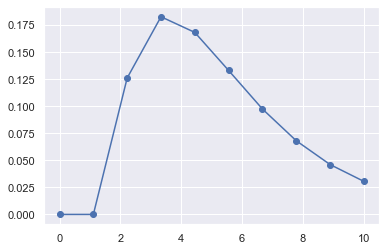

In [204]:
from pylab import linspace, plot
import scipy.stats

dist = scipy.stats.gamma
param = (1.9870, 1.5026, 2.0174)
X = linspace(0,10, 10)
pdf_fitted = dist.pdf(X, *param)
plot(X, pdf_fitted, 'o-')

In [38]:
import gpboost as gpb
gp_model = gpb.GPModel(group_data=df['subject_id'], likelihood="lognorm")
gp_model.fit(y='cc_normalized_per_volume', x = 'group_id')
gp_model.summary()

OSError: dlopen(/Users/Sofie/opt/anaconda3/envs/DCL_image/lib/python3.8/site-packages/gpboost/lib_gpboost.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/Sofie/opt/anaconda3/envs/DCL_image/lib/python3.8/site-packages/gpboost/lib_gpboost.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)